## ECC plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Open results.txt (Place where I store experiment results of the ECC :) 

f_normal = open("./results.txt")
lines = f_normal.readlines()

#f = open("./new_results.txt")
#lines = f.readlines()

In [3]:
i = 0
lloss = 0
data={"centered":{}, "not_centered":{}}

for line in lines[1:]: 
    i+=1
    a = line.split('\t')
    if ("(" in a[1]):
        a_ = a[1].replace("(", "").replace(")", "").replace(",", "")
        loss = float(a_)
    else: 
        loss = float(a[1])
    time = a[2]
    transport = False if "!" in a[3] else True
    success = True if "Tru" in a[4] else False
    if transport:     
        if lloss == loss:
            print("not same c")
            data["centered"]["{}".format(loss)]["duration"].append(int(time))
            data["centered"]["{}".format(loss)]["success"].append(success)
        else: 
            data["centered"]["{}".format(loss)] = {"duration": [time], "success": [success]}
        lloss = loss
    else: 
        if lloss == loss:
            print("not same nc")
            data["not_centered"]["{}".format(loss)]["duration"].append(int(time))
            data["not_centered"]["{}".format(loss)]["success"].append(success)
        else: 
            data["not_centered"]["{}".format(loss)]= {"duration": [time], "success": [success]}
        lloss = loss
        
    

not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not 

IndexError: list index out of range

In [4]:
losses = []
for items in data["centered"]: 
    losses.append(items)


In [52]:
#print(data)

def analyze_vars(data, type_):
    losses = []
    for items in data["{}".format(type_)]: 
        losses.append(items)
    
    data_ = {}
    for loss in losses:
        data_["{}".format(loss)]={"avg":0, "succ_per":0}
        duration_ = data["{}".format(type_)][str(loss)]["duration"]
        success = data["{}".format(type_)][str(loss)]["success"]
        # Add max time for duration
        success_i = [i for i, s in enumerate(success) if s]
        # Take duration of only succesful runs
        duration_s = [int(duration_[i]) for i in success_i]
        #duration_s = [int(duration_[i]) for i, s in enumerate(success)]
        #print(duration_s)
        new_dur = []; new_dur_ = [];  
        # Remove from list unsucessful experiments (zeros instead of max value)
        #for i in duration_s: 
        #    if i == 81 or i==61: 
        #        new_dur.append(0)
        #    else: 
        #        new_dur.append(i)
        #print("new_dur: ", new_dur)
        # Swap zeros with max duration until then
        #for i in new_dur: 
        #    if i == 0: 
        #        new_dur_.append(max(new_dur))
        #    else: 
        #        new_dur_.append(i)
        #
        #duration_s = new_dur_
        #print(duration_s)
        
        
        if len(duration_s) > 0:
            data_["{}".format(loss)]["avg"] = float(sum(duration_s))/len(duration_s)
            data_["{}".format(loss)]["max"] = max(duration_s)
            data_["{}".format(loss)]["min"] = min(duration_s)
            data_["{}".format(loss)]["succ_per"] = len(success_i)/10
        else: 
            data_["{}".format(loss)]["avg"] = 0
            data_['{}'.format(loss)]["max"] = 0
            data_["{}".format(loss)]["min"] = 0
            data_["{}".format(loss)]["succ_per"] = 0
            
        

    
    return losses, data_

In [53]:
try:
   losses, c_data = analyze_vars(data, "centered")
except Exception as e:
    print(str(e))
try:
    losses, nc_data = analyze_vars(data, "not_centered")
except Exception as e:
    print(str(e))

In [54]:
print(c_data)

#print(nc_data)
print("######")
print(nc_data)

{'0.1': {'avg': 22.6, 'succ_per': 1.0, 'max': 46, 'min': 16}, '0.5': {'avg': 18.2, 'succ_per': 1.0, 'max': 25, 'min': 15}, '0.75': {'avg': 21.7, 'succ_per': 1.0, 'max': 34, 'min': 17}, '0.8': {'avg': 22.444444444444443, 'succ_per': 0.9, 'max': 30, 'min': 17}, '0.85': {'avg': 22.0, 'succ_per': 0.9, 'max': 30, 'min': 17}, '0.9': {'avg': 24.0, 'succ_per': 0.8, 'max': 39, 'min': 16}, '0.95': {'avg': 32.0, 'succ_per': 0.2, 'max': 37, 'min': 27}, '0.99': {'avg': 0, 'succ_per': 0, 'max': 0, 'min': 0}}
######
{'0.1': {'avg': 37.77777777777778, 'succ_per': 0.9, 'max': 67, 'min': 23}, '0.5': {'avg': 32.7, 'succ_per': 1.0, 'max': 54, 'min': 24}, '0.75': {'avg': 31.0, 'succ_per': 0.9, 'max': 41, 'min': 23}, '0.8': {'avg': 27.88888888888889, 'succ_per': 0.9, 'max': 33, 'min': 24}, '0.85': {'avg': 29.77777777777778, 'succ_per': 0.9, 'max': 36, 'min': 25}, '0.9': {'avg': 39.333333333333336, 'succ_per': 0.3, 'max': 44, 'min': 35}, '0.95': {'avg': 39.0, 'succ_per': 0.2, 'max': 43, 'min': 35}, '0.99': {

In [55]:
c_avg = []
c_min = []
c_max = []
c_suc = []

nc_avg = []
nc_min = []
nc_max = []
nc_suc = []

for i in c_data:
    c_avg.append(c_data[i]['avg'])
    c_max.append(c_data[i]['max'])
    c_min.append(c_data[i]['min'])
    c_suc.append(c_data[i]['succ_per'])

for i in nc_data:
    nc_avg.append(nc_data[i]['avg'])
    nc_max.append(nc_data[i]['max'])
    nc_min.append(nc_data[i]['min'])
    nc_suc.append(nc_data[i]['succ_per'])


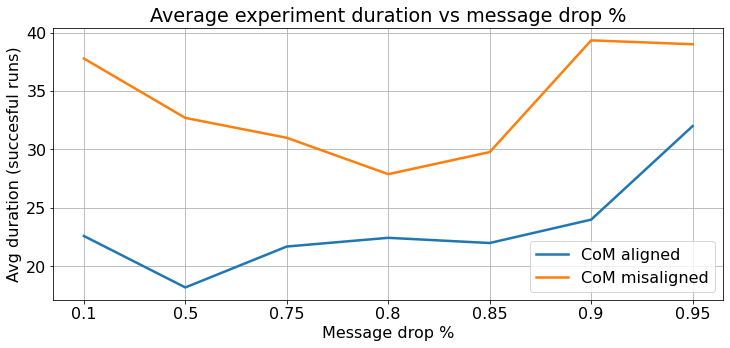

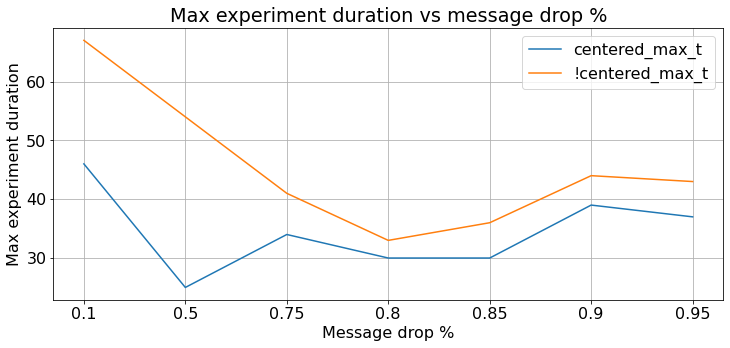

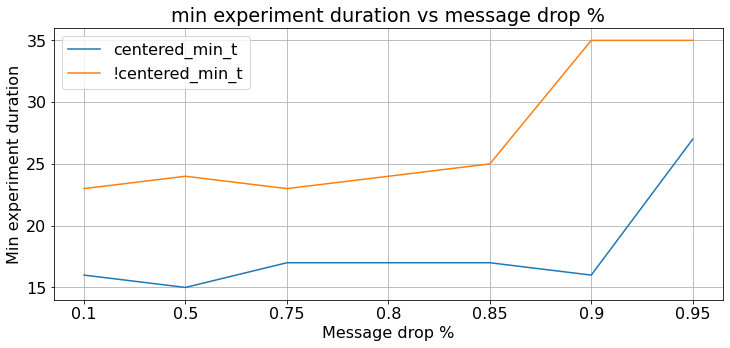

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


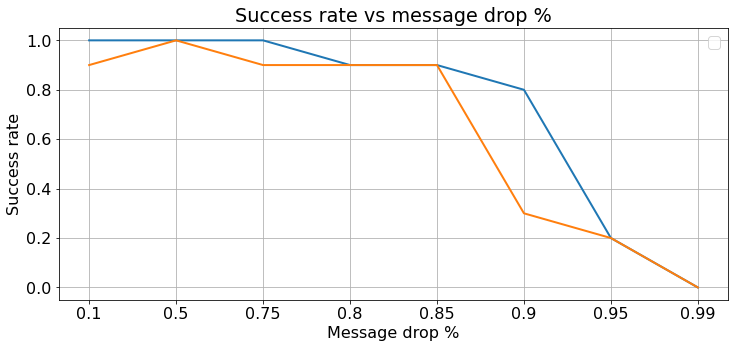

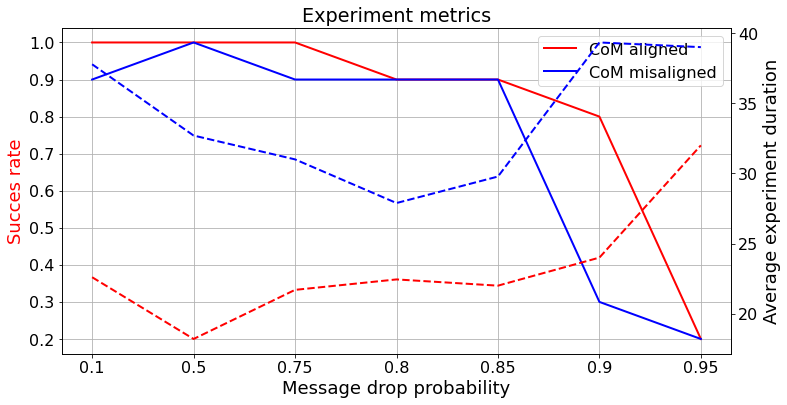

In [85]:
import matplotlib
import matplotlib.pyplot as plt



matplotlib.rcParams.update({'font.size': 16})
# https://matplotlib.org/stable/gallery/ticks/tick_labels_from_values.html
plt.figure(figsize=(12, 5))
plt.plot(losses[:-1], c_avg[:-1], label="CoM aligned", linewidth=2.5)
plt.plot(losses[:-1], nc_avg[:-1], label="CoM misaligned", linewidth=2.5)
plt.grid()
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Avg duration (succesful runs)')
plt.title('Average experiment duration vs message drop %')
plt.savefig('message_drop_vs_avg_duration.png')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(losses[:-1], c_max[:-1], label="centered_max_t")
plt.plot(losses[:-1], nc_max[:-1], label="!centered_max_t")
plt.grid()
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Max experiment duration')
plt.title('Max experiment duration vs message drop %')
plt.savefig('message_drop_vs_max_duration.png')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(losses[:-1], c_min[:-1], label="centered_min_t")
plt.plot(losses[:-1], nc_min[:-1], label="!centered_min_t")
plt.grid()
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Min experiment duration')
plt.title('min experiment duration vs message drop %')
plt.savefig('message_drop_vs_min_duration.png')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(losses, c_suc, linewidth=2)
plt.plot(losses, nc_suc, linewidth=2)
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Success rate')
plt.title('Success rate vs message drop %')
plt.grid()
plt.savefig('message_drop_vs_success_rate.png')
plt.show()





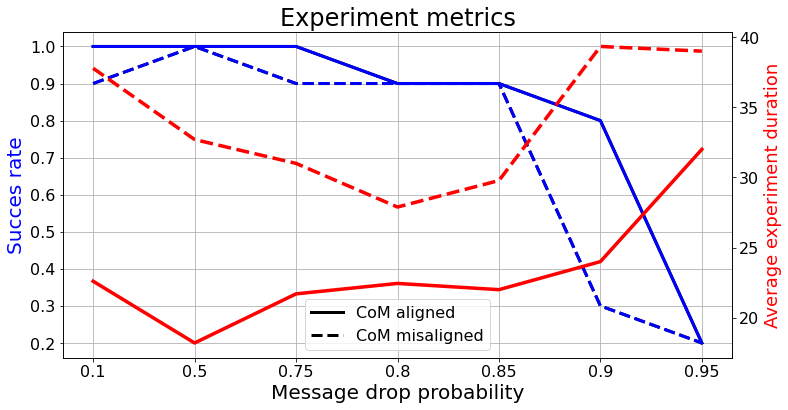

In [108]:
# create figure and axis objects with subplots()
b="blue"; r="red"
fig,ax = plt.subplots(figsize=(12, 6))
# make a plot
ax.plot(losses[:-1], c_suc[:-1], color="black", linewidth="3", label="CoM aligned")
ax.plot(losses[:-1], nc_suc[:-1], color="black", linewidth="3", linestyle="--", label="CoM misaligned")
ax.plot(losses[:-1], c_suc[:-1], color=b, linewidth="3")
ax.plot(losses[:-1], nc_suc[:-1], color=b, linewidth="3", linestyle="--")
ax.set_title('Experiment metrics', fontsize=24)
plt.legend(loc='lower center')

# set x-axis label
ax.set_xlabel("Message drop probability", fontsize = 20)
# set y-axis label
ax.set_ylabel("Succes rate", color=b, fontsize=20)
ax.grid()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(losses[:-1], c_avg[:-1], color=r, linewidth="3.5")
ax2.plot(losses[:-1], nc_avg[:-1], color=r, linewidth="3.5", linestyle="--")
ax2.set_ylabel("Average experiment duration", color=r, fontsize=18)
plt.savefig('experiment_metrics.svg')
plt.show()



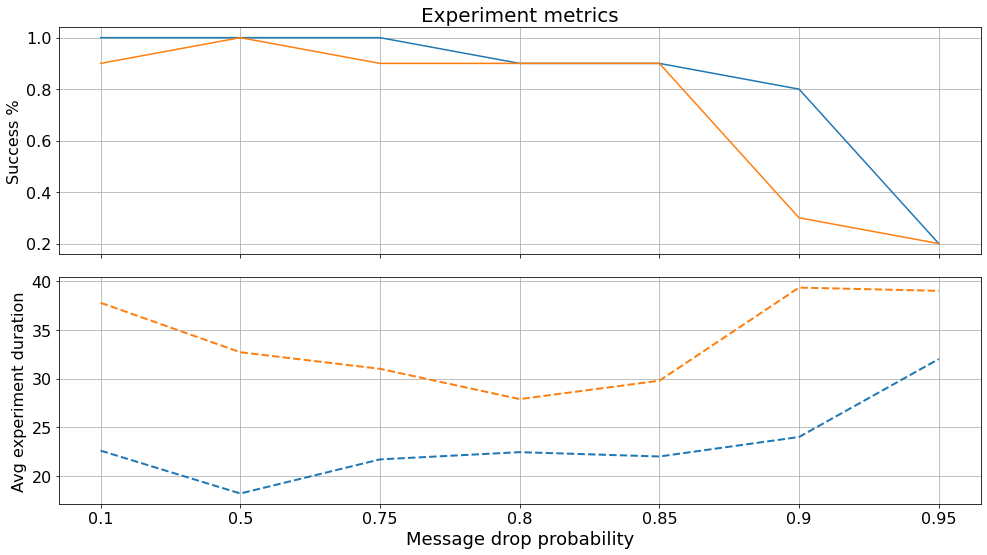

In [76]:
fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
axs[0].set_title('Experiment metrics', fontsize=20)
axs[0].plot(losses[:-1], c_suc[:-1], losses[:-1], nc_suc[:-1])

axs[0].set_ylabel('Success %')
axs[0].grid(True)

axs[1].plot(losses[:-1], c_avg[:-1], losses[:-1], nc_avg[:-1], linewidth=2, linestyle="--")
axs[1].set_xlabel('Message drop probability', fontsize=18)
axs[1].set_ylabel('Avg experiment duration')
axs[1].grid(True)

fig.tight_layout()
plt.show()

In [12]:
losses = list(set([float(l) for l in losses]))
losses.sort

<function list.sort(*, key=None, reverse=False)>

In [82]:
remove_keys = ['0.8', '0.81', '0.82', '0.83', '0.84', '0.87', '0.95', '0.96', '0.97', '0.98', '0.99']  

print(nc_data)
print(c_data)
    
for i in remove_keys: 
    try:
        del nc_data[i]
    except Exception as e:
        print(str(e))
    try:
        del c_data[i]
    except Exception as e:
        print(str(e))
        


for i in c_data:
    c_avg.append(c_data[i]['avg'])
    c_max.append(c_data[i]['max'])
    c_min.append(c_data[i]['min'])
    c_suc.append(c_data[i]['succ_per'])

for i in nc_data:
    nc_avg.append(nc_data[i]['avg'])
    nc_max.append(nc_data[i]['max'])
    nc_min.append(nc_data[i]['min'])
    nc_suc.append(nc_data[i]['succ_per'])


print(nc_data)
print(c_data)

{'0.85': {'avg': 35.0, 'succ_per': 0.8, 'max': 40, 'min': 28}, '0.86': {'avg': 34.6, 'succ_per': 0.5, 'max': 45, 'min': 24}, '0.88': {'avg': 31.0, 'succ_per': 0.7, 'max': 36, 'min': 27}, '0.89': {'avg': 28.833333333333332, 'succ_per': 0.6, 'max': 38, 'min': 23}, '0.9': {'avg': 34.0, 'succ_per': 0.2, 'max': 41, 'min': 27}, '0.91': {'avg': 28.5, 'succ_per': 0.2, 'max': 33, 'min': 24}, '0.92': {'avg': 41.0, 'succ_per': 0.2, 'max': 43, 'min': 39}, '0.93': {'avg': 35.0, 'succ_per': 0.1, 'max': 35, 'min': 35}, '0.94': {'avg': 30.0, 'succ_per': 0.1, 'max': 30, 'min': 30}}
{'0.85': {'avg': 23.857142857142858, 'succ_per': 0.7, 'max': 34, 'min': 19}, '0.86': {'avg': 21.444444444444443, 'succ_per': 0.9, 'max': 30, 'min': 15}, '0.88': {'avg': 22.333333333333332, 'succ_per': 0.9, 'max': 32, 'min': 15}, '0.89': {'avg': 28.0, 'succ_per': 0.9, 'max': 61, 'min': 15}, '0.9': {'avg': 36.22222222222222, 'succ_per': 0.9, 'max': 56, 'min': 23}, '0.91': {'avg': 25.25, 'succ_per': 0.8, 'max': 43, 'min': 16}, 

In [205]:
losses


[0.1, 0.5, 0.85, 0.8, 0.75, 0.9, 0.95, 0.99]

In [206]:
nc_suc

[0.9, 1.0, 0.9, 0.9, 0.9, 0.3, 0.2, 0]